In [1]:
import numpy as np
import pandas as pd

def produce_data(n_points=1000):
    data = pd.DataFrame()
    
    np.random.seed(0)
    
    data['practice'] = np.random.random(n_points)
    data['time_period'] = np.random.random(n_points)
    data['error'] = np.random.random(n_points)
    
    data['label'] = np.round(data['practice']*data['time_period'] + 0.3+0.1*data['error'])
    data['label'][data['practice']>0.8] = 1
    data['label'][data['time_period']>0.8] = 1
    
    return data

if __name__ == '__main__':
    data = produce_data()
    print(data)

/usr/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)


     practice  time_period     error  label
0    0.548814     0.592880  0.811518    1.0
1    0.715189     0.010064  0.476084    0.0
2    0.602763     0.475826  0.523156    1.0
3    0.544883     0.708770  0.250521    1.0
4    0.423655     0.043975  0.605043    0.0
5    0.645894     0.879521  0.302905    1.0
6    0.437587     0.520081  0.577284    1.0
7    0.891773     0.030661  0.169678    1.0
8    0.963663     0.224414  0.159469    1.0
9    0.383442     0.953676  0.417030    1.0
10   0.791725     0.582320  0.426820    1.0
11   0.528895     0.107473  0.268109    0.0
12   0.568045     0.287545  0.131597    0.0
13   0.925597     0.456704  0.039211    1.0
14   0.071036     0.020950  0.025232    0.0
15   0.087129     0.411616  0.271550    0.0
16   0.020218     0.489459  0.461853    0.0
17   0.832620     0.243678  0.726243    1.0
18   0.778157     0.588639  0.474872    1.0
19   0.870012     0.753240  0.904051    1.0
20   0.978618     0.235834  0.035220    1.0
21   0.799159     0.620500  0.18

/usr/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)


In [2]:
# 特征选择
from sklearn.model_selection import train_test_split
features_train,features_test,label_train,label_test = train_test_split(data[['practice','time_period']],data['label'],test_size=0.25)
features_train

,practice,time_period
340,0.370853,0.258059
821,0.000546,0.340605
154,0.123820,0.800256
985,0.492361,0.342226
996,0.514922,0.721198
321,0.131483,0.037130
59,0.244426,0.558051
323,0.301599,0.342104
385,0.908844,0.540048
98,0.828940,0.615058


In [3]:
train_data = features_train.copy()
train_data['label'] = label_train
train_data.head()

,practice,time_period,label
340,0.370853,0.258059,0.0
821,0.000546,0.340605,0.0
154,0.123820,0.800256,1.0
985,0.492361,0.342226,1.0
996,0.514922,0.721198,1.0


In [7]:
practice_fail = train_data[train_data['label']==0]['practice']
time_period_fail = train_data[train_data['label']==0]['time_period']

practice_pass = train_data[train_data['label']==1]['practice']
time_period_pass = train_data[train_data['label']==1]['time_period']

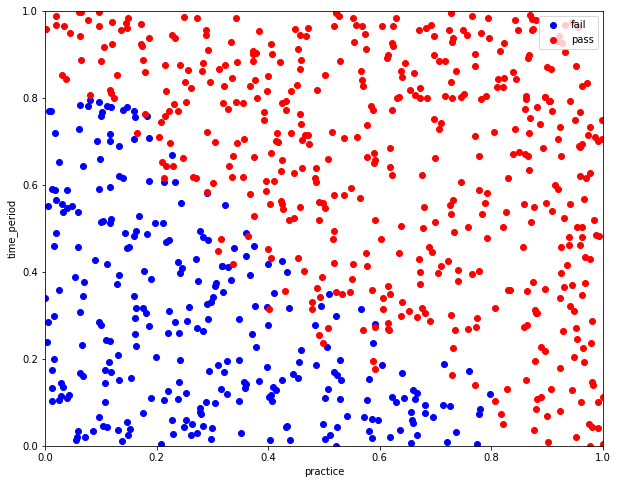

In [10]:
# 画图
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
plt.xlim(0.0,1.0)
plt.ylim(0.0,1.0)
plt.scatter(practice_fail,time_period_fail,color='b',label='fail')
plt.scatter(practice_pass,time_period_pass,color='r',label='pass')
plt.xlabel('practice')
plt.ylabel('time_period')
plt.legend(loc='upper right')